# Ridge and Lasso Regression :-

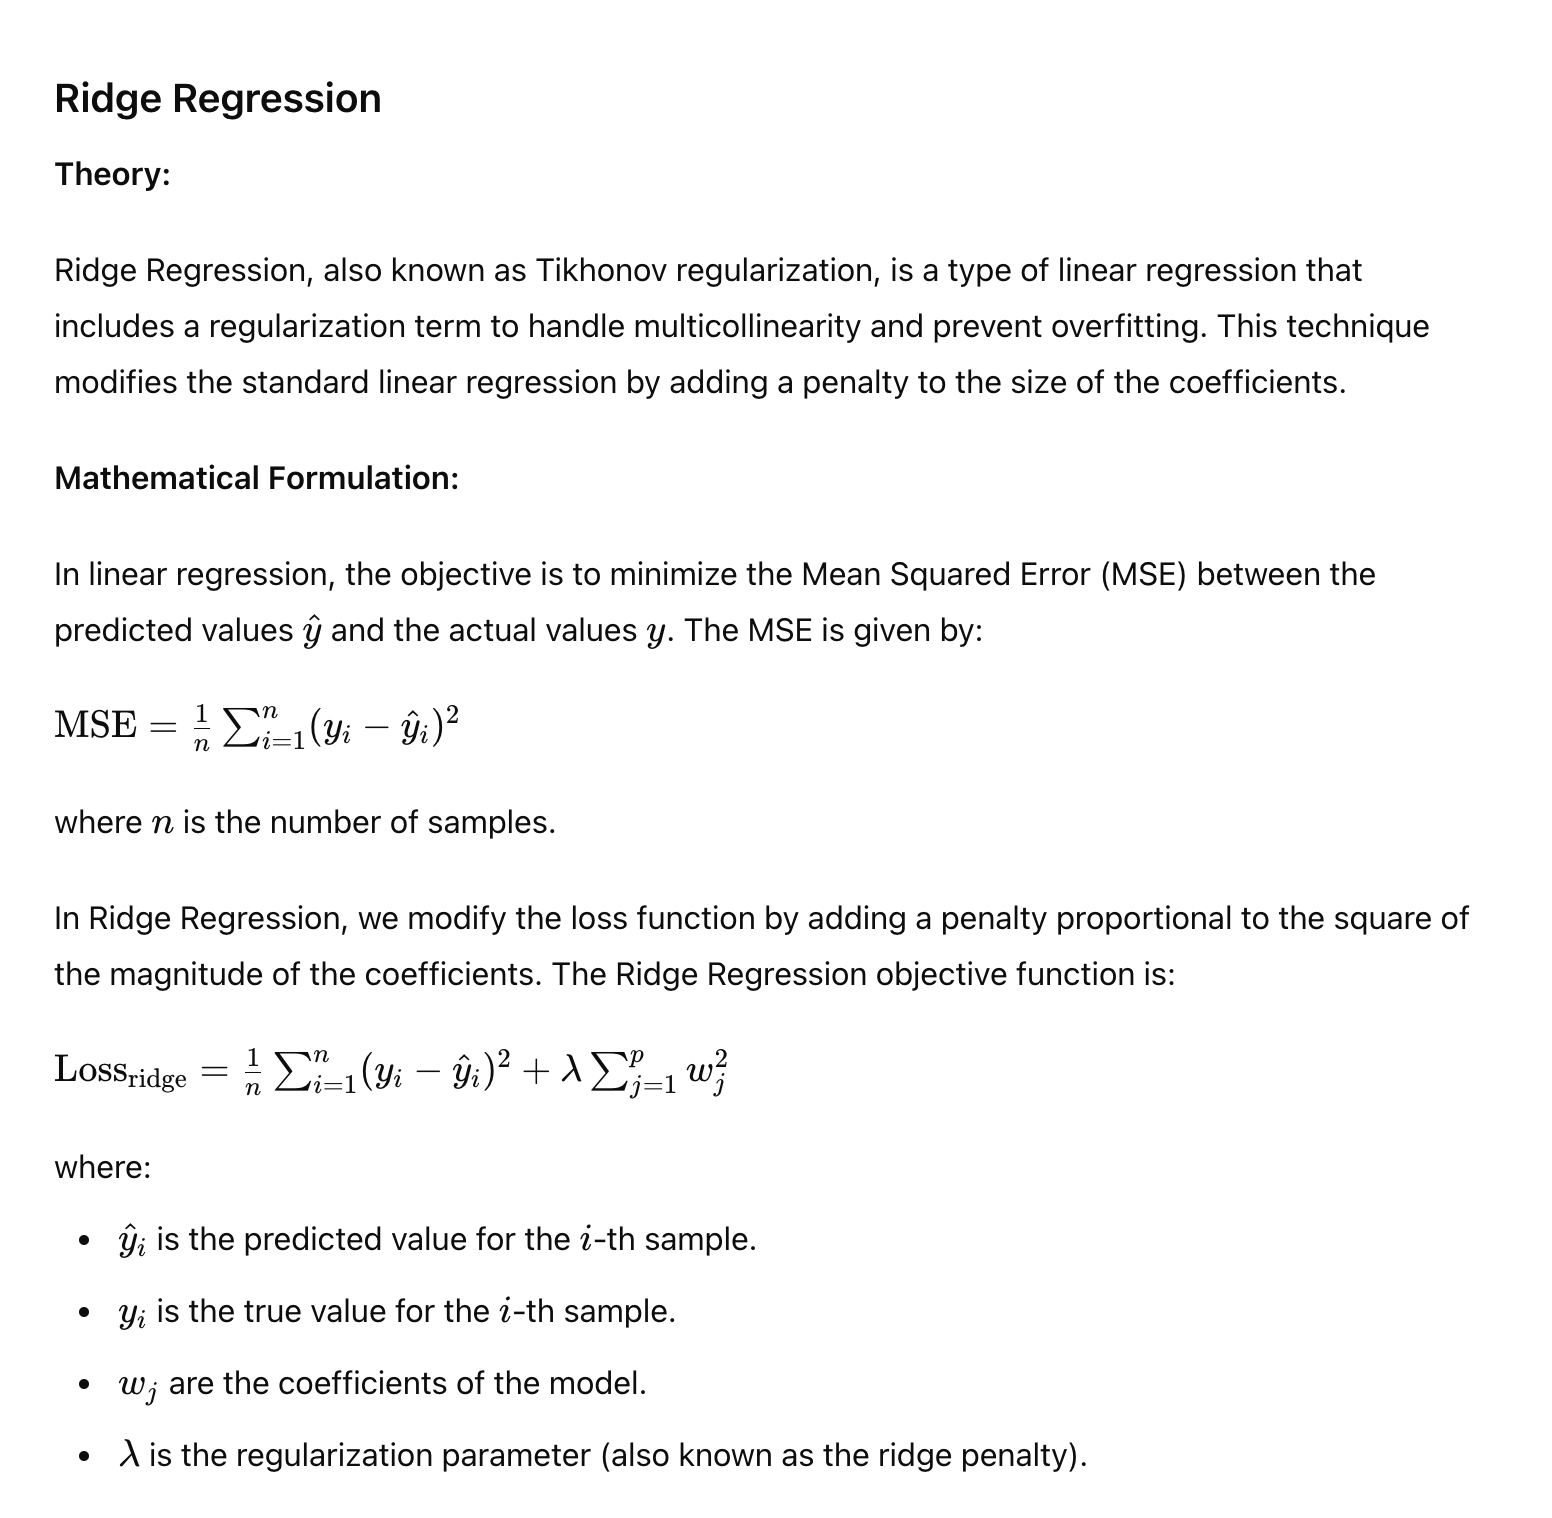

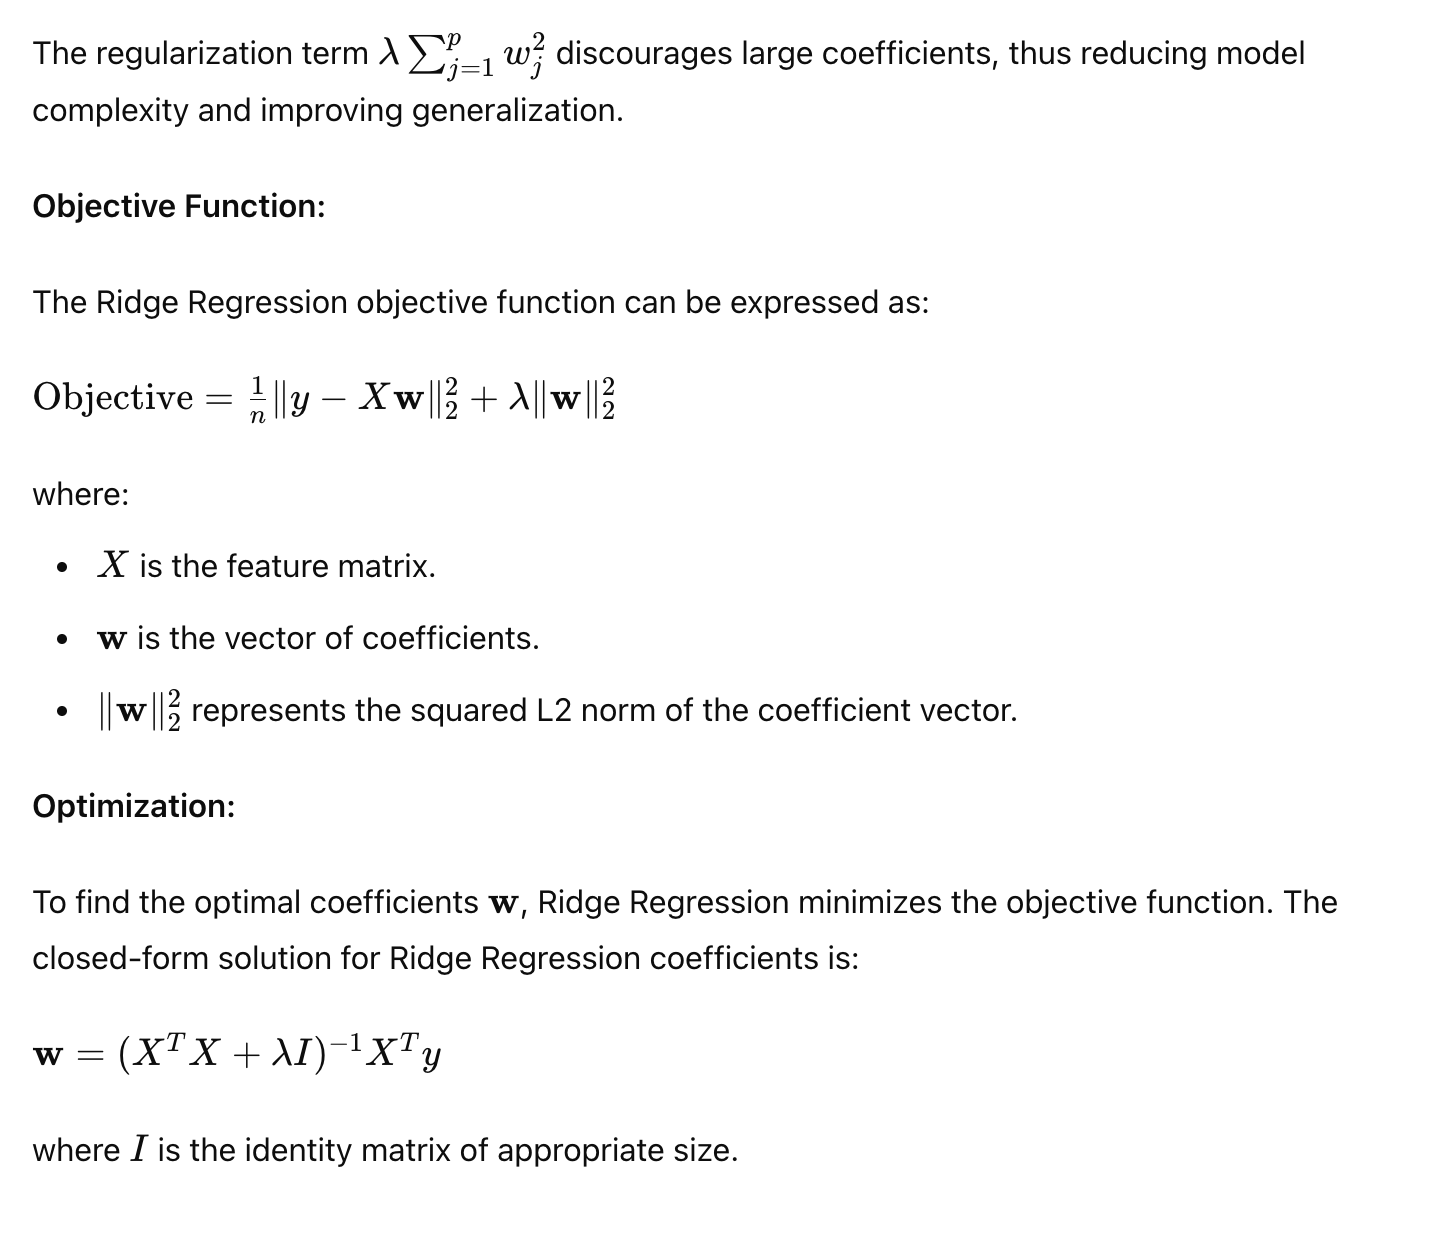

#Lasso Regression

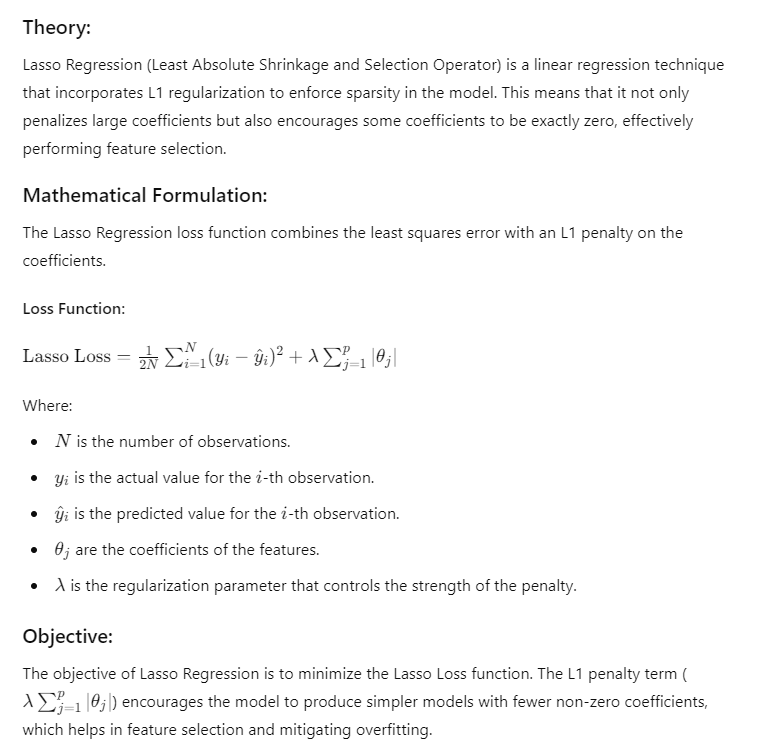

# Defining the Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RidgeRegression:
    def __init__(self, alpha=1.0, learning_rate=0.01, num_iterations=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.losses_train = []
        self.losses_test = []

    def fit(self, X_train, y_train, X_test, y_test):
        self.m, self.n = X_train.shape
        self.theta = np.zeros(self.n)

        for iteration in range(self.num_iterations):
            predictions_train = X_train.dot(self.theta)
            errors_train = predictions_train - y_train
            gradient = (1 / self.m) * (X_train.T.dot(errors_train) + self.alpha * self.theta)
            self.theta -= self.learning_rate * gradient

            # Calculate and store training loss
            train_loss = (1 / (2 * self.m)) * (np.sum(errors_train ** 2) + self.alpha * np.sum(self.theta ** 2))
            self.losses_train.append(train_loss)

            # Calculate and store testing loss
            predictions_test = X_test.dot(self.theta)
            errors_test = predictions_test - y_test
            test_loss = (1 / (2 * X_test.shape[0])) * (np.sum(errors_test ** 2) + self.alpha * np.sum(self.theta ** 2))
            self.losses_test.append(test_loss)
        return predictions_train,predictions_test

    def predict(self, X):
        return X.dot(self.theta)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

    def plot_losses(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.losses_train, label='Training Loss')
        plt.plot(self.losses_test, label='Testing Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training and Testing Loss vs. Iteration')
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LassoRegression:
    def __init__(self, alpha=1.0, learning_rate=0.01, num_iterations=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.losses_train = []
        self.losses_test = []

    def fit(self, X_train, y_train, X_test, y_test):
        self.m, self.n = X_train.shape
        self.theta = np.zeros(self.n)

        for iteration in range(self.num_iterations):
            predictions_train = X_train.dot(self.theta)
            errors_train = predictions_train - y_train
            gradient = (1 / self.m) * X_train.T.dot(errors_train) + self.alpha * np.sign(self.theta)
            self.theta -= self.learning_rate * gradient

            # Calculate and store training loss
            train_loss = (1 / (2 * self.m)) * np.sum(errors_train ** 2) + self.alpha * np.sum(np.abs(self.theta))
            self.losses_train.append(train_loss)

            # Calculate and store testing loss
            predictions_test = X_test.dot(self.theta)
            errors_test = predictions_test - y_test
            test_loss = (1 / (2 * X_test.shape[0])) * np.sum(errors_test ** 2) + self.alpha * np.sum(np.abs(self.theta))
            self.losses_test.append(test_loss)
        return predictions_train, predictions_test

    def predict(self, X):
        return X.dot(self.theta)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

    def plot_losses(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.losses_train, label='Training Loss')
        plt.plot(self.losses_test, label='Testing Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Training and Testing Loss vs. Iteration')
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Create synthetic data
np.random.seed(42)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)
true_coef = np.array([5, -3, 2, 0, 0, 0, 0, 0, 0, 0])  # Sparse coefficients
y = X.dot(true_coef) + np.random.randn(n_samples) * 0.4  # Add some noise


In [ ]:
print(X.shape,y.shape)

(100, 10) (100,)


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Step 2: Ridge and Lasso with different penalty values
alphas = np.logspace(-4, 1, 100)  # Penalty values (λ)

ridge_coefs = []
lasso_coefs = []

# Fit Ridge models for each alpha and store coefficients
for alpha in alphas:
    ridge_reg = RidgeRegression(alpha=alpha, learning_rate=0.01, num_iterations=1000)
    ridge_reg.fit(X_train_scaled, y_train, X_test_scaled, y_test)
    ridge_coefs.append(ridge_reg.theta)

# Fit Lasso models for each alpha and store coefficients
for alpha in alphas:
    lasso_reg = LassoRegression(alpha=alpha, learning_rate=0.01, num_iterations=1000)
    lasso_reg.fit(X_train_scaled, y_train, X_test_scaled, y_test)
    lasso_coefs.append(lasso_reg.theta)

# Convert to numpy arrays
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)


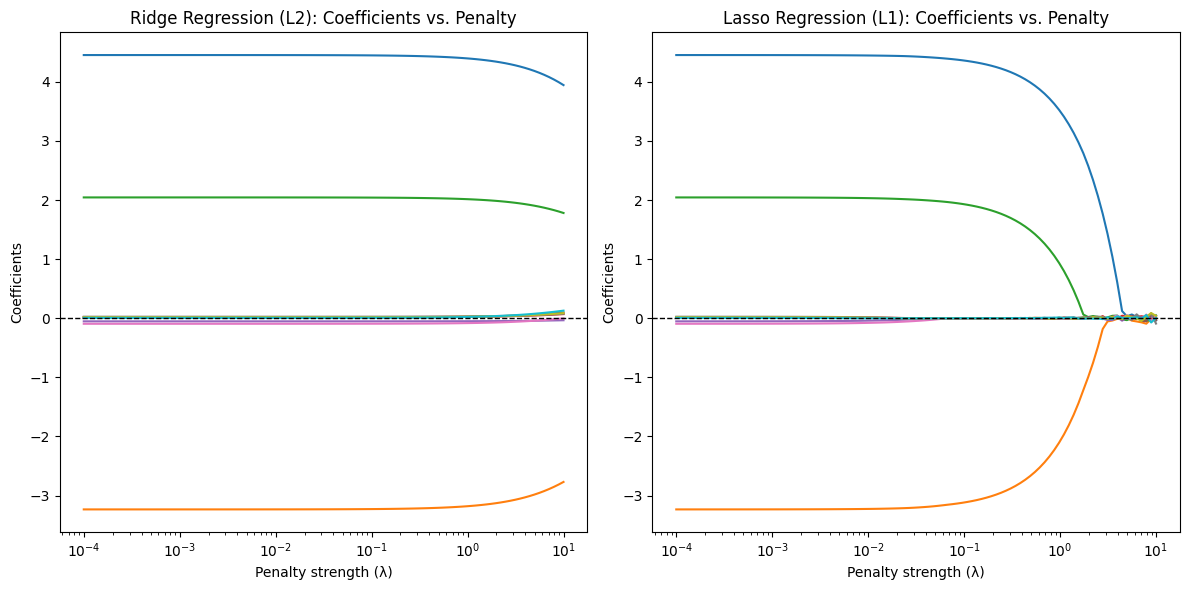

In [ ]:

# Step 3: Plot Ridge and Lasso coefficient shrinkage
plt.figure(figsize=(12, 6))

# Ridge coefficient shrinkage plot
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Penalty strength (λ)')
plt.ylabel('Coefficients')
plt.title('Ridge Regression (L2): Coefficients vs. Penalty')
plt.axhline(0, color='black', lw=1, linestyle='--')

# Lasso coefficient shrinkage plot
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Penalty strength (λ)')
plt.ylabel('Coefficients')
plt.title('Lasso Regression (L1): Coefficients vs. Penalty')
plt.axhline(0, color='black', lw=1, linestyle='--')

plt.tight_layout()
plt.show()



Penalty Shrinkage Visualization:

Ridge: As the penalty strength (λ) increases, all coefficients shrink smoothly but are never reduced to zero.

Lasso: As λ increases, some coefficients are reduced to exactly zero, which creates sparsity.

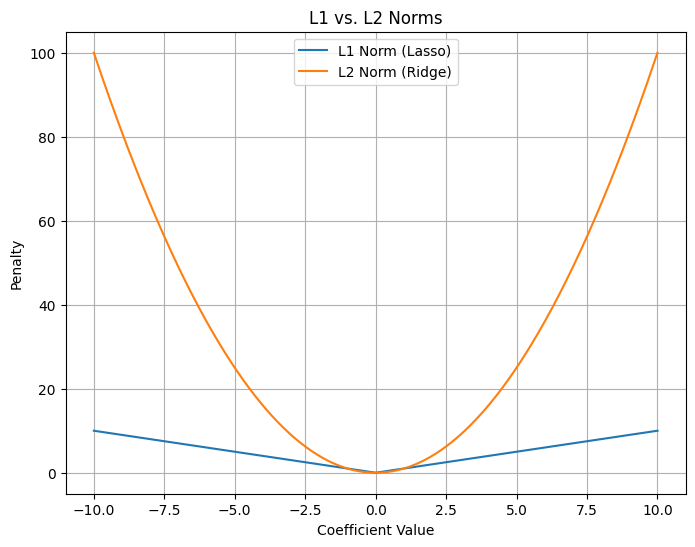

In [ ]:
# Step 4: Visualize L1 vs L2 Norm
def l1_l2_norm_plot():
    coef_range = np.linspace(-10, 10, 400)
    l1_norm = np.abs(coef_range)
    l2_norm = coef_range**2

    plt.figure(figsize=(8, 6))
    plt.plot(coef_range, l1_norm, label='L1 Norm (Lasso)')
    plt.plot(coef_range, l2_norm, label='L2 Norm (Ridge)')
    plt.title('L1 vs. L2 Norms')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Penalty')
    plt.legend()
    plt.grid(True)
    plt.show()

l1_l2_norm_plot()

# Regularization and Overfitting :

In [ ]:
def mse(y_true, y_pred):
    square_error = (y_pred - y_true) ** 2
    return np.mean(square_error)


In [ ]:
class LinearRegression:
    def __init__(self, num_features):
        self.W = np.zeros(num_features)
        self.loss_history_train = []
        self.loss_history_test = []

    def gradient_step(self, X, y, lr):
        y_pred = self.predict(X)
        grad_w = ((y_pred - y).T @ X) / len(X)  # Derivative of loss function wrt w

        # Update weights without regularization
        self.W -= lr * grad_w

    def fit(self, X_train, y_train, X_test, y_test, num_iters=1000, learning_rate=0.01):
        self.num_iters = num_iters
        self.learning_rate = learning_rate
        self.loss_history_train = []
        self.loss_history_test = []

        for iter in range(num_iters):
            y_train_pred = self.predict(X_train)
            train_loss = mse(y_train, y_train_pred)
            self.loss_history_train.append(train_loss)

            # Perform a gradient step
            self.gradient_step(X_train, y_train, learning_rate)

            # Compute and store test loss
            y_test_pred = self.predict(X_test)
            test_loss = mse(y_test, y_test_pred)
            self.loss_history_test.append(test_loss)

        return y_train_pred, y_test_pred

    def predict(self, X):
        assert X.shape[-1] == self.W.shape[0], "X and W don't have compatible dimensions"
        return X @ self.W  # Predict using the dot product of X and W

    def plot_losses(self):
        plt.figure(figsize=(12, 6))
        plt.plot(range(self.num_iters), self.loss_history_train, label='Training Loss')
        plt.plot(range(self.num_iters), self.loss_history_test, label='Testing Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Training and Testing Loss Over Iterations')
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
# Step 2: Fit Linear Regression (No Regularization)
lin_reg = LinearRegression(num_features=10)
lin_reg.fit(X_train_scaled, y_train,X_test_scaled,y_test)
y_train_pred_lin = lin_reg.predict(X_train_scaled)
y_test_pred_lin = lin_reg.predict(X_test_scaled)

# Step 3: Fit Ridge Regression (With Regularization)
ridge_reg = RidgeRegression(alpha=1.0, learning_rate=0.01, num_iterations=1000)
y_train_pred_ridge, y_test_pred_ridge = ridge_reg.fit(X_train_scaled, y_train, X_test_scaled, y_test)

# Calculate training and test errors
from sklearn.metrics import mean_squared_error

train_error_lin = mean_squared_error(y_train, y_train_pred_lin)
test_error_lin = mean_squared_error(y_test, y_test_pred_lin)

train_error_ridge = ridge_reg.score(X_train_scaled, y_train)
test_error_ridge = ridge_reg.score(X_test_scaled, y_test)

print(f"Linear Regression - Training Error: {train_error_lin:.4f}, Test Error: {test_error_lin:.4f}")
print(f"Ridge Regression - Training Error: {train_error_ridge:.4f}, Test Error: {test_error_ridge:.4f}")


Linear Regression - Training Error: 0.3366, Test Error: 0.3738
Ridge Regression - Training Error: 0.3434, Test Error: 0.3502
